# Quantum Money Simulation

Based off **Wiesner's quantum money scheme** we run an experiment simulating the transaction and prinitng of Quantum Bills. As well as malcious agents indiviudals trying to conterfit bills

### Conterfiters Simulated
- **Regular Attacker**: Froges a bill they withdrew by randomly guessing the postion and value of each Qubit position 
- **Statistical Attacker**: Forges a bill by Iterativaly meassuring the Qubit in each bill (collapsing the orignal note) attempts to deposit both the real and forged note 
- **Entangled Attacker**: Useing entanglement to find information about the Qubits value and position, attempts a forgery on the Bill. Iterativly meassuring each note they withdrew and keeping the best Bill that is more likely to yield a successful forgery attempt by the information they recived through entanglement. 

In [17]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

import sys, os
sys.path.append(os.path.abspath(".."))

from src.bank import Bank
from src.qAgent import Agent
from src.regularAttacker import RegularAttacker
from src.statisticalAttacker import StatAttacker
from src.entangledAttacker import EntangledAttacker

In [18]:
# Set up Vars and Bank

N_QUBITS = 16  # Number Of QuBits Per Note
N_TRIALS = 2000  # Number Of Trails 
THRESHOLD = .80
bank = Bank(n_qubits=N_QUBITS)

In [19]:
# Run Simulation Function
def run_sim(agent_class, n_qubits = N_QUBITS, n_trials = N_TRIALS, threshold = THRESHOLD): 

    # init bank
    bank = Bank(n_qubits=N_QUBITS)

    if agent_class == EntangledAttacker:
        agent = agent_class(bank=bank, threshold=threshold)
    else:
        agent = agent_class(bank=bank)

    count = 0

    for i in range(n_trials):
        success = False

        # Agent is a regular attacker
        if agent_class == RegularAttacker:
            serial, note = agent.withdraw()
            serial, forged_note = agent.forge(serial)
            serial_deposit, success = agent.deposit()

        elif agent_class == StatAttacker:
            serial, note = agent.withdraw()
            memory = agent.measure_all(serial)
            serial, forged_note = agent.forge(serial)
            serial_deposit, success = agent.deposit()

        elif agent_class == EntangledAttacker:
            serial, note = agent.withdraw()
            agent.evaluate(serial)
            if agent.best_serial:
                serial, forged_note= agent.forge_best()
                serial_deposit, success = agent.deposit_best()
            else:
                success = False

        if success:
            count += 1
            
    success_rate = count / n_trials
    return success_rate



In [20]:
agents = [RegularAttacker, StatAttacker, EntangledAttacker]
results = {}

# iterate through agent class
for agent_class in agents:
    print(f"Running simulation for {agent_class.__name__}...")
    success_rate = run_sim(
        agent_class, n_qubits=N_QUBITS, n_trials=N_TRIALS, threshold=THRESHOLD
    )
    results[agent_class.__name__] = success_rate

Running simulation for RegularAttacker...
Deposit FAILURE for forged Note serial 5425bdec55e27fc1
Real note deposited to avoid suspicion for serial 5425bdec55e27fc1
Deposit FAILURE for forged Note serial a6f55322dbd2c324
Real note deposited to avoid suspicion for serial a6f55322dbd2c324
Deposit FAILURE for forged Note serial 1d58f0ea2a904477
Real note deposited to avoid suspicion for serial 1d58f0ea2a904477
Deposit FAILURE for forged Note serial 7cb9cf6cccc9a0c0
Real note deposited to avoid suspicion for serial 7cb9cf6cccc9a0c0
Deposit FAILURE for forged Note serial 977b9968862959d0
Real note deposited to avoid suspicion for serial 977b9968862959d0
Deposit FAILURE for forged Note serial 04d08438df487778
Real note deposited to avoid suspicion for serial 04d08438df487778
Deposit FAILURE for forged Note serial 3188922cdd0f02aa
Real note deposited to avoid suspicion for serial 3188922cdd0f02aa
Deposit FAILURE for forged Note serial f27c900432382ecf
Real note deposited to avoid suspicion fo

In [21]:
# Print a simple summary table
print("Quantum Bill Forgery Success Rates")
for attacker_name, rate in results.items():
    print(f"{attacker_name}: {rate:.2%}")

Quantum Bill Forgery Success Rates
RegularAttacker: 0.95%
StatAttacker: 1.95%
EntangledAttacker: 8.60%


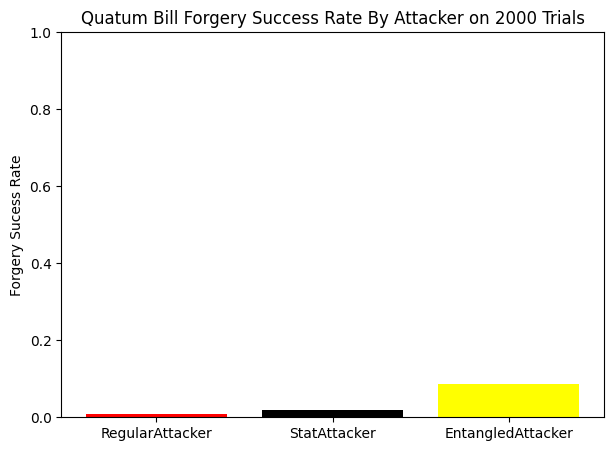

In [22]:
import matplotlib.pyplot as plt

# prepare data
attacker_name = list(results.keys())
success_value = [results[name] for name in attacker_name]

# plot 

plt.figure(figsize=(7,5))
plt.bar(attacker_name, success_value, color=['red', 'black', 'yellow'])
plt.ylim(0,1)
plt.ylabel("Forgery Sucess Rate")
plt.title(f"Quatum Bill Forgery Success Rate By Attacker on {N_TRIALS} Trials")
plt.show()